In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import offsetbox
from sklearn.manifold import TSNE
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
    
train_images = mnist.train.images
train_labels = mnist.train.labels
test_images = mnist.test.images
test_labels = mnist.test.labels




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((55000, 784), (55000,), (10000, 784), (10000,))

In [59]:
train_images = train_images[:400] 
test_labels = test_labels[:400]

In [69]:
train_images.shape

((400, 784), array([7, 2, 1, 0, 4], dtype=uint8))

In [6]:
from sklearn.decomposition import PCA

train_pca = PCA(n_components=0.95)
reduced_train_images = train_pca.fit_transform(train_images)

x_embedded = TSNE(n_components=2).fit_transform(reduced_train_images)

In [71]:
x_embedded.shape, np.unique(test_labels), x_embedded[:,1].shape

((400, 2),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 (400,),
 array([  5.65181077e-01,   5.85129213e+00,  -6.14910936e+00,
          1.32084208e+01,  -7.17280388e+00,   2.46415854e+00,
         -7.60929012e+00,   2.50057659e+01,   2.78580451e+00,
          3.21286011e+00,   2.15074310e+01,   7.69623423e+00,
         -4.20694494e+00,   2.06874046e+01,  -5.48798323e+00,
          2.46890335e+01,  -1.30633335e+01,  -1.98916149e+01,
          1.94232826e+01,   2.74023247e+01,  -3.15189767e+00,
          1.21822567e+01,  -4.88961411e+00,  -8.36665344e+00,
          2.64100695e+00,  -1.25908022e+01,   1.25687170e+01,
         -2.29175072e+01,   4.56339169e+00,   2.74362755e+00,
         -6.65803862e+00,   6.40717220e+00,  -4.19966841e+00,
         -9.49487782e+00,  -2.50655007e+00,  -1.51779041e+01,
          7.10320044e+00,  -4.11691475e+00,  -7.21637917e+00,
          1.33696871e+01,   1.57420807e+01,   6.82852221e+00,
          5.65821362e+00,   3.55604196e+00,  -1.32207794e+0

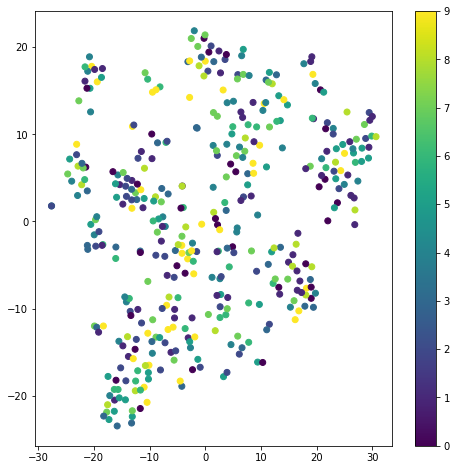

In [64]:
plt.figure(figsize=(8,8))
cs = plt.scatter(x_embedded[:,0], x_embedded[:,1], c=test_labels)
plt.colorbar(cs)
plt.show()

In [86]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

In [87]:
plot_digits(x_embedded, test_labels)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 400 but corresponding boolean dimension is 10000